# Analysis of the Relationship Between CPI, Unemployment Rate, and Fed Rate Over 25 Years

## Introduction:
This report analyzes the relationship between the Consumer Price Index (CPI), Unemployment Rate, and Federal Reserve (Fed) Rate over 25 years. Data for this analysis is from **api.Bls** and **api.stlouisfed**. Examining these economic indicators to identify patterns and correlations can provide insights into the interplay between inflation, unemployment, and monetary policy.

In [110]:
import datetime
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [111]:


def get_cpi_data_chunk(start_year, end_year):
    url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
    series_id = "CUUR0000SA0"
    data = {
        "seriesid": [series_id],
        "startyear": str(start_year),
        "endyear": str(end_year),
        "registrationkey": "48419d1543284e85ac383516c4336a02"
    }

    try:
        response = requests.post(url, json=data)
        response.raise_for_status()  
        json_data = response.json()
        cpi_data = []
        for series in json_data['Results']['series']:
            for item in series['data']:
                year = item['year']
                period = item['period']
                value = float(item['value'])
                cpi_data.append({'Year': year, 'Period': period, 'CPI': value})
        return cpi_data
    except requests.exceptions.RequestException as e:
        print("Error:", e)
        return None

def get_complete_cpi_data(start_year, end_year):
    cpi_data = []
    current_year = start_year
    while current_year <= end_year:
        chunk_end_year = min(current_year + 7, end_year)
        chunk_data = get_cpi_data_chunk(current_year, chunk_end_year)
        if chunk_data:
            cpi_data.extend(chunk_data)
        else:
            print(f"Failed to fetch data for {current_year}-{chunk_end_year}")
        current_year = chunk_end_year + 1
    return cpi_data

def calculate_average_cpi(cpi_data):
    cpi_by_year = {}
    for entry in cpi_data:
        year = entry['Year']
        cpi = entry['CPI']
        if year in cpi_by_year:
            cpi_by_year[year].append(cpi)
        else:
            cpi_by_year[year] = [cpi]
    average_cpi_by_year = {}
    for year, cpi_values in cpi_by_year.items():
        average_cpi = sum(cpi_values) / len(cpi_values)
        average_cpi_by_year[year] = average_cpi
    sorted_average_cpi_by_year = dict(sorted(average_cpi_by_year.items()))
    return sorted_average_cpi_by_year

# CPI data 25 years:
start_year = datetime.datetime.now().year - 25
end_year = datetime.datetime.now().year
complete_cpi_data = get_complete_cpi_data(start_year, end_year)
  



In [112]:
if complete_cpi_data:
    average_cpi_by_year = calculate_average_cpi(complete_cpi_data)
    df_cpi = pd.DataFrame(list(average_cpi_by_year.items()), columns=['Year', 'CPI'])
else:
    print("Failed to fetch complete CPI data.")
    
df_cpi['CPI_Diff_Percentage'] = df_cpi['CPI'].pct_change() * 100
df_cpi['CPI_Diff_Percentage'].fillna(0, inplace=True)

# decided to use data by period
if complete_cpi_data:
    df_cpi_period = pd.DataFrame(complete_cpi_data)
else:
    print("Failed to fetch complete CPI data.")
df_cpi_period['Period'] = df_cpi_period['Period'].str[1:]
df_cpi_period['Date'] = df_cpi_period['Year'].astype(str) + '-' + df_cpi_period['Period']
df_cpi_period['Date'] = pd.to_datetime(df_cpi_period['Date'])
df_cpi_period = df_cpi_period.sort_values(by='Date')

df_cpi_period['CPI_Diff_Percentage'] = df_cpi_period['CPI'].pct_change() * 100
df_cpi_period['CPI_Diff_Percentage'].fillna(0, inplace=True)

In [113]:

def get_unemployment_data_chunk(start_year, end_year):
    url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
    series_id = "LNS14000000" 
    data = {
        "seriesid": [series_id],
        "startyear": str(start_year),
        "endyear": str(end_year),
        "registrationkey": "48419d1543284e85ac383516c4336a02"
    }

    try:
        response = requests.post(url, json=data)
        response.raise_for_status()  
        json_data = response.json()
        unemployment_data = []
        for series in json_data['Results']['series']:
            for item in series['data']:
                year = item['year']
                period = item['period']
                value = float(item['value'])
                unemployment_data.append({'Year': year, 'Period': period, 'Unemployment Rate': value})
        return unemployment_data
    except requests.exceptions.RequestException as e:
        print("Error:", e)
        return None

def get_complete_unemployment_data(start_year, end_year):

    unemployment_data = []
    current_year = start_year
    while current_year <= end_year:
        chunk_end_year = min(current_year + 7, end_year)
        chunk_data = get_unemployment_data_chunk(current_year, chunk_end_year)
        if chunk_data:
            unemployment_data.extend(chunk_data)
        else:
            print(f"Failed to fetch data for {current_year}-{chunk_end_year}")
        current_year = chunk_end_year + 1
    return unemployment_data

def calculate_average_unemployment_rate(unemployment_data):

    unemployment_by_year = {}

    for entry in unemployment_data:
        year = entry['Year']
        unemployment_rate = entry['Unemployment Rate']
        if year in unemployment_by_year:
            unemployment_by_year[year].append(unemployment_rate)
        else:
            unemployment_by_year[year] = [unemployment_rate]

    average_unemployment_rate_by_year = {}
    for year, unemployment_rates in unemployment_by_year.items():
        average_unemployment_rate = sum(unemployment_rates) / len(unemployment_rates)
        average_unemployment_rate_by_year[year] = average_unemployment_rate

    sorted_average_unemployment_rate_by_year = dict(sorted(average_unemployment_rate_by_year.items()))
    return sorted_average_unemployment_rate_by_year

start_year = datetime.datetime.now().year - 25
end_year = datetime.datetime.now().year
complete_unemployment_data = get_complete_unemployment_data(start_year, end_year)



In [114]:
if complete_unemployment_data:
    average_unemployment_rate_by_year = calculate_average_unemployment_rate(complete_unemployment_data)
    df_unemployment = pd.DataFrame(list(average_unemployment_rate_by_year.items()), columns=['Year', 'Average Unemployment Rate'])
else:
    print("Failed to fetch complete unemployment rate data.")
    
    
if complete_unemployment_data:
    df_unemployment_period = pd.DataFrame(complete_unemployment_data)
else:
    print("Failed to fetch complete Unemployment data.")
    
df_unemployment_period['Period'] = df_unemployment_period['Period'].str[1:]
df_unemployment_period['Date'] = df_unemployment_period['Year'].astype(str) + '-' + df_unemployment_period['Period']
df_unemployment_period['Date'] = pd.to_datetime(df_unemployment_period['Date'])
df_unemployment_period = df_unemployment_period.sort_values(by='Date')
df_unemployment_period['Unemployment_Rate_Diff'] = df_unemployment_period['Unemployment Rate'].diff()



In [115]:

url = "https://api.stlouisfed.org/fred/series/observations"

series_id = "FEDFUNDS"

api_key = "dc87c8fe9bf89e38d9e86a18aac471a9"

params = {
    "series_id": series_id,
    "api_key": api_key,
    "file_type": "json",
    "observation_start": "1999-01-01",  
    "observation_end": "2023-12-31"      
}


fed_rate = requests.get(url, params=params)

if fed_rate.status_code == 200:
    data = fed_rate.json()
    observations = data['observations']
    df_fed = pd.DataFrame(observations)
    df_fed['date'] = pd.to_datetime(df_fed['date'])
    df_fed['Year'] = df_fed['date'].dt.year
    df_fed['Fed_Rate'] = pd.to_numeric(df_fed['value'])
    df_fed = df_fed.groupby('Year')['Fed_Rate'].mean().reset_index()
    df_fed = df_fed.sort_values(by='Year')

else:
    print("Failed to retrieve FED Funds Rate data.")

In [116]:
df_fed_period = pd.DataFrame(observations)

df_fed_period['date'] = pd.to_datetime(df_fed_period['date'])
df_fed_period = df_fed_period.sort_values(by='date')
df_fed_period['Fed_Rate'] = pd.to_numeric(df_fed_period['value'])
df_fed_period['Fed_Rate_Diff'] = df_fed_period['Fed_Rate'].diff()


## Analysis:
The analysis of the 25-year dataset reveals several notable relationships between CPI, Unemployment Rate, and Fed Rate. Visual representation of the data through a chart with three datasets—Unemployment Rate, Fed Rate, and CPI, along with a CPI regression line—provides a clear overview of these dynamics.



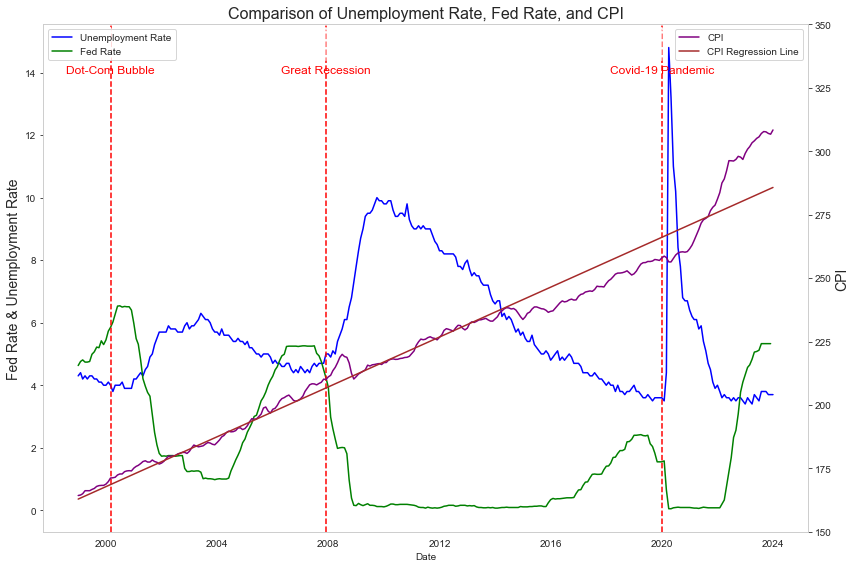

In [117]:

recession_date = pd.to_datetime('2007-12-01')
pandemic_date = pd.to_datetime('2020-01-01')
dot_com_bubble_date = pd.to_datetime('2000-03-01')

##
# Fit a linear regression line
coefficients = np.polyfit(df_cpi_period['Date'].astype(np.int64) // 10**9, df_cpi_period['CPI'], 1)
poly = np.poly1d(coefficients)

# Generate dates for regression line
min_date = df_cpi_period['Date'].min()
max_date = df_cpi_period['Date'].max()
regression_dates = pd.date_range(start=min_date, end=max_date, freq='D')
regression_values = poly(regression_dates.astype(np.int64) // 10**9)
##

sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.lineplot(data=df_unemployment_period, x='Date', y='Unemployment Rate', marker='', color='blue', label='Unemployment Rate', ax=ax1)

sns.lineplot(data=df_fed_period, x='date', y='Fed_Rate', marker='', color='green', label='Fed Rate', ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(data=df_cpi_period, x='Date', y='CPI', marker='', color='purple', label='CPI', ax=ax2)
plt.plot(regression_dates, regression_values, color='Brown', label='CPI Regression Line')

ax2.set_ylim(150, 350)

ax1.set_ylabel('Fed Rate & Unemployment Rate', fontsize=14)

ax2.set_ylabel('CPI', fontsize=14)

plt.title('Comparison of Unemployment Rate, Fed Rate, and CPI', fontsize=16)

plt.xticks(rotation=45)

handles1, labels1 = ax1.get_legend_handles_labels()

handles2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(handles1, labels1, loc='upper left')

ax2.legend(handles2, labels2, loc='upper right')

ax1.grid(False)
ax2.grid(False)

ax1.axvline(x=recession_date, color='red', linestyle='--')
ax1.axvline(x=pandemic_date, color='red', linestyle='--')
ax1.axvline(x=dot_com_bubble_date, color='red', linestyle='--')

ax1.annotate('Great Recession', xy=(recession_date, ax1.get_ylim()[1]), xytext=(recession_date, ax1.get_ylim()[1] * 0.9),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12, color='red', ha='center')
ax1.annotate('Covid-19 Pandemic', xy=(pandemic_date, ax1.get_ylim()[1]), xytext=(pandemic_date, ax1.get_ylim()[1] * 0.9),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12, color='red', ha='center')
ax1.annotate('Dot-Com Bubble', xy=(dot_com_bubble_date, ax1.get_ylim()[1]), xytext=(dot_com_bubble_date, ax1.get_ylim()[1] * 0.9),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12, color='red', ha='center')

plt.tight_layout()
plt.show()


### - Inverse Relationship between Fed Rate and Unemployment Rate:
Consistent with economic theory and historical observations, an inverse relationship exists between the Federal Reserve (Fed) Rate and the Unemployment Rate. When the Unemployment Rate is low, indicating a strong labor market and potentially increasing inflationary pressures, the Fed tends to raise interest rates to moderate economic activity and control inflation. Conversely, during periods of high unemployment, the Fed typically lowers interest rates to stimulate economic growth and reduce unemployment.

### - Influence of CPI Deviation on Unemployment Rate and Fed Rate:
The analysis indicates that deviations of the Consumer Price Index (CPI) from the regression line have significant implications for both the Unemployment and the Fed rates. When the CPI exceeds the CPI regression line for sustained periods, it often increases the Unemployment Rate as businesses adjust their operations in response to higher costs. The Fed may respond by lowering interest rates to mitigate the impact on economic growth.

### - Impact of Financial Crises:
Two major financial crises— the dot-com bubble and the Great Recession— are highlighted in the analysis. These crises are marked by vertical red lines on the chart to illustrate their impact on the relationship between CPI, Unemployment, and Fed rates. During these periods of economic turmoil, the traditional inverse relationship between the Unemployment Rate and the Fed Rate may become more pronounced, with significant deviations from historical trends.

### - Covid-19 Pandemic:
The COVID-19 pandemic represents a unique case in the analysis, characterized by a sharp increase in unemployment coupled with high inflationary pressures. The Fed responded by swiftly lowering interest rates to support the economy amid widespread job losses and disrupted economic activity. However, the resultant surge in CPI above the regression line might cause the next financial crisis.

## Conclusion:
In conclusion, the analysis of the relationship between CPI, Unemployment Rate, and Fed Rate over 25 years reveals complex dynamics influenced by economic cycles, policy responses, and external shocks. While a general inverse relationship between the Fed Rate and the Unemployment Rate persists, deviations from historical trends, such as during financial crises and the Covid-19 pandemic, highlight the importance of adaptive monetary policy. By understanding these relationships, policymakers can effectively navigate economic challenges and pursue stability and growth objectives.